In [29]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot, cat_emb

In [30]:
data = read_csv_data("../data/processed_job_postings_large.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level", "title_emb"], "standardized_annual_salary")
data = clean_location(data, 2)

import random
random.seed(42)
random.shuffle(data)

train_data = data[:15000]
val_data = data[15000:30000]
test_data = data[30000:]

In [31]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

7

In [32]:
# Attempt with basic MLP

from mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_one_hot = MLPDataset(temp, [float(target)/10000 for _, target in train_data])

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_one_hot = MLPDataset(temp, [float(target)/10000 for _, target in val_data])
temp[0].shape

torch.Size([299])

In [35]:
from mlp import MLP, train_model
total_features = train_one_hot[0][0].shape[0]
model = MLP(input_size=total_features, hidden_size=200, output_size=1)  

Iter 50: Loss: 127.61160278320312 Train mae 8.68415632032787, Validation mae 8.62597170181345
Iter 100: Loss: 111.4621810913086 Train mae 8.587795592037939, Validation mae 8.52944020702235
Iter 150: Loss: 116.58615112304688 Train mae 8.497154176803283, Validation mae 8.43849970046721
Iter 200: Loss: 76.32870483398438 Train mae 8.395254185146944, Validation mae 8.335936814800325
Iter 250: Loss: 83.87036895751953 Train mae 8.28677023148721, Validation mae 8.223839267254295
Iter 300: Loss: 107.003662109375 Train mae 8.177793529775597, Validation mae 8.11424155410669
Iter 350: Loss: 112.06616973876953 Train mae 8.044778090036768, Validation mae 7.979944444314057
Iter 400: Loss: 77.74510192871094 Train mae 7.899051428384441, Validation mae 7.832891307508365
Iter 450: Loss: 177.06785583496094 Train mae 7.745254907217484, Validation mae 7.676675076480122
Iter 500: Loss: 104.22606658935547 Train mae 7.590285861036235, Validation mae 7.524466086830112
Iter 550: Loss: 95.51688385009766 Train mae

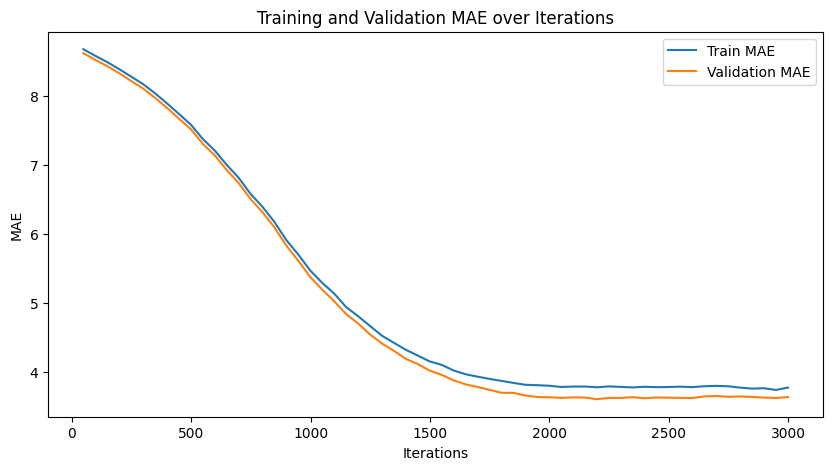

In [36]:
train_model(model, train_one_hot, val_one_hot, 0.0001, batch_size=100, num_epochs=20)

In [ ]:
# Attempt to add topic embedding to improve the model

from mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
temp = cat_emb(temp, train_data, 4)
train_one_hot_with_emb = MLPDataset(temp, [float(target) for _, target in train_data])

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
temp = cat_emb(temp, val_data, 4)
val_one_hot_with_emb = MLPDataset(temp, [float(target) for _, target in val_data])

In [ ]:
train_one_hot_with_emb[0][0].shape

In [ ]:
from mlp import MLP, train_model
total_features = train_one_hot_with_emb[0][0].shape[0]
model = MLP(input_size=total_features, hidden_size=64, output_size=1)  

In [ ]:
train_model(model, train_one_hot_with_emb, val_one_hot_with_emb, 0.01, batch_size=100, num_epochs=10)

In [ ]:
train_data[-1]

In [ ]:
# Change to Categorical
data = read_csv_data("../data/processed_job_postings_large.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level", "title_emb"], "salary_level")
data = clean_location(data, 2)

import random
random.seed(70)
random.shuffle(data)

train_data = data[:100]
val_data = data[100:200]
test_data = data[200:]

In [ ]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

In [ ]:
import torch
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

targets = [data[i][1] for i in range(len(data))]

labels = ['10K-'] + [f"{i}K - {i + 10}K" for i in range(10, 150, 10)] + ['160K+']
label_to_int = {label: i for i, label in enumerate(labels)}

targets = list(map(lambda x: label_to_int[x], targets))

targets = torch.tensor(targets)

train_targets = targets[:20000]
val_targets = targets[20000:30000]
test_targets = targets[30000:]

In [ ]:
train_targets

In [ ]:
# Attempt with basic MLP

from mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_one_hot = MLPDataset(temp, [target.type(torch.LongTensor) for target in train_targets])



temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_one_hot = MLPDataset(temp, [target.type(torch.LongTensor) for target in val_targets])

In [ ]:
from mlp import MLP, train_classifier
total_features = train_one_hot[0][0].shape[0]
model = MLP(input_size=total_features, hidden_size=100, output_size=len(labels))  

In [ ]:
train_classifier(model, train_one_hot, val_one_hot, 0.01, batch_size=100, num_epochs=10)